In [64]:
# !pip install pyspellchecker
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\19167\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\19167\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\19167\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from spellchecker import SpellChecker
from collections import Counter

# Load Data

In [66]:
data_url = "./raw_datasets/SUAS-Competition-FALL2023-Final-Report.txt"

# Read the file
with open(data_url, 'r',encoding='utf-8') as file:
    text = file.read()

In [67]:
print(text)

﻿SUAS Competition - Software Team
FALL 2023 Final Report
Authors:        Marc Cruz, Abdul Kalam Syed, Max Gross, Joshua Estrada, Jason Mar, Josh Ng, 
Ethan Tarrer, Sarkis Gafayan, Rubayet Mujahid, David Jackson
Status:                Done
Date:                Sep 21, 2023


Relative Links:
SUAS Competition - Software Team Overview
SUAS Competition - Technical Design Document
SUAS Competition - Machine Learning Models


1. Introduction        2
2. FALL 2023 Progress        3
2.1 Timeline        3
2.2 Recruitment (August - September)        4
2.3 Learning Phase (August - October)        4
2.3.1 ODLC        4
2.3.2 Obstacle Avoidance        5
2.4 ODLC Design        5
2.5 Hardware Trade Studies        7
2.5.1 ODLC Trade Studies        7
2.5.1.1 OBC Trade Study        7
2.5.1.1 Camera Trade Study        8
2.5.2 Obstacle Avoidance Trade Study        9
2.6 Data Collection and Dataset Phase (October - December)        10
2.6.1 Standardized Object shape ML model        10
2.6.2 Standardized Obj

# Text cleanup

In [68]:
# Remove punctuation
cleaned_text = re.sub(r'[^\w\s]', '', text)

# Convert to lowercase
cleaned_text = cleaned_text.lower()

print(cleaned_text)

suas competition  software team
fall 2023 final report
authors        marc cruz abdul kalam syed max gross joshua estrada jason mar josh ng 
ethan tarrer sarkis gafayan rubayet mujahid david jackson
status                done
date                sep 21 2023


relative links
suas competition  software team overview
suas competition  technical design document
suas competition  machine learning models


1 introduction        2
2 fall 2023 progress        3
21 timeline        3
22 recruitment august  september        4
23 learning phase august  october        4
231 odlc        4
232 obstacle avoidance        5
24 odlc design        5
25 hardware trade studies        7
251 odlc trade studies        7
2511 obc trade study        7
2511 camera trade study        8
252 obstacle avoidance trade study        9
26 data collection and dataset phase october  december        10
261 standardized object shape ml model        10
262 standardized object shape  alphanumeric color ml model        12
263 s

In [69]:
# Tokenization
tokens = word_tokenize(cleaned_text)

In [70]:
print(tokens)

['suas', 'competition', 'software', 'team', 'fall', '2023', 'final', 'report', 'authors', 'marc', 'cruz', 'abdul', 'kalam', 'syed', 'max', 'gross', 'joshua', 'estrada', 'jason', 'mar', 'josh', 'ng', 'ethan', 'tarrer', 'sarkis', 'gafayan', 'rubayet', 'mujahid', 'david', 'jackson', 'status', 'done', 'date', 'sep', '21', '2023', 'relative', 'links', 'suas', 'competition', 'software', 'team', 'overview', 'suas', 'competition', 'technical', 'design', 'document', 'suas', 'competition', 'machine', 'learning', 'models', '1', 'introduction', '2', '2', 'fall', '2023', 'progress', '3', '21', 'timeline', '3', '22', 'recruitment', 'august', 'september', '4', '23', 'learning', 'phase', 'august', 'october', '4', '231', 'odlc', '4', '232', 'obstacle', 'avoidance', '5', '24', 'odlc', 'design', '5', '25', 'hardware', 'trade', 'studies', '7', '251', 'odlc', 'trade', 'studies', '7', '2511', 'obc', 'trade', 'study', '7', '2511', 'camera', 'trade', 'study', '8', '252', 'obstacle', 'avoidance', 'trade', 'stu

In [71]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

In [72]:
print(filtered_tokens)

['suas', 'competition', 'software', 'team', 'fall', '2023', 'final', 'report', 'authors', 'marc', 'cruz', 'abdul', 'kalam', 'syed', 'max', 'gross', 'joshua', 'estrada', 'jason', 'mar', 'josh', 'ng', 'ethan', 'tarrer', 'sarkis', 'gafayan', 'rubayet', 'mujahid', 'david', 'jackson', 'status', 'done', 'date', 'sep', '21', '2023', 'relative', 'links', 'suas', 'competition', 'software', 'team', 'overview', 'suas', 'competition', 'technical', 'design', 'document', 'suas', 'competition', 'machine', 'learning', 'models', '1', 'introduction', '2', '2', 'fall', '2023', 'progress', '3', '21', 'timeline', '3', '22', 'recruitment', 'august', 'september', '4', '23', 'learning', 'phase', 'august', 'october', '4', '231', 'odlc', '4', '232', 'obstacle', 'avoidance', '5', '24', 'odlc', 'design', '5', '25', 'hardware', 'trade', 'studies', '7', '251', 'odlc', 'trade', 'studies', '7', '2511', 'obc', 'trade', 'study', '7', '2511', 'camera', 'trade', 'study', '8', '252', 'obstacle', 'avoidance', 'trade', 'stu

In [73]:
# Stemming
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in filtered_tokens]

In [74]:
print(stemmed_tokens)

['sua', 'competit', 'softwar', 'team', 'fall', '2023', 'final', 'report', 'author', 'marc', 'cruz', 'abdul', 'kalam', 'sy', 'max', 'gross', 'joshua', 'estrada', 'jason', 'mar', 'josh', 'ng', 'ethan', 'tarrer', 'sarki', 'gafayan', 'rubayet', 'mujahid', 'david', 'jackson', 'statu', 'done', 'date', 'sep', '21', '2023', 'rel', 'link', 'sua', 'competit', 'softwar', 'team', 'overview', 'sua', 'competit', 'technic', 'design', 'document', 'sua', 'competit', 'machin', 'learn', 'model', '1', 'introduct', '2', '2', 'fall', '2023', 'progress', '3', '21', 'timelin', '3', '22', 'recruit', 'august', 'septemb', '4', '23', 'learn', 'phase', 'august', 'octob', '4', '231', 'odlc', '4', '232', 'obstacl', 'avoid', '5', '24', 'odlc', 'design', '5', '25', 'hardwar', 'trade', 'studi', '7', '251', 'odlc', 'trade', 'studi', '7', '2511', 'obc', 'trade', 'studi', '7', '2511', 'camera', 'trade', 'studi', '8', '252', 'obstacl', 'avoid', 'trade', 'studi', '9', '26', 'data', 'collect', 'dataset', 'phase', 'octob', 'd

In [75]:
# Remove extra whitespaces
cleaned_text = re.sub('\s+', ' ', cleaned_text).strip()

In [76]:
vocab = Counter(stemmed_tokens)
print(vocab)

Counter({'model': 58, 'imag': 55, '3': 36, 'train': 36, 'object': 32, 'dataset': 30, 'detect': 28, '35': 28, 'color': 27, '1': 26, 'learn': 24, '2': 24, 'data': 24, 'shape': 23, 'machin': 22, 'weight': 22, 'team': 21, 'sua': 20, 'softwar': 20, '5': 20, 'competit': 19, 'alphanumer': 19, 'phase': 18, 'studi': 18, 'trade': 17, 'standard': 17, 'yolo': 16, 'member': 16, 'use': 16, 'high': 16, 'need': 16, '4': 15, 'obstacl': 15, 'collect': 15, 'implement': 15, 'descript': 15, 'grade': 15, 'recruit': 14, 'uav': 14, 'creat': 14, 'process': 14, 'avoid': 13, 'circl': 13, 'odlc': 12, 'work': 12, 'consid': 12, 'requir': 12, 'target': 12, 'would': 12, 'time': 12, 'class': 12, 'project': 11, 'comput': 11, 'test': 11, 'folder': 11, 'design': 10, 'recognit': 10, 'system': 10, 'methodolog': 10, '6': 10, 'w': 10, 'accuraci': 10, 'valu': 10, 'octob': 9, 'ml': 9, '12': 9, 'task': 9, 'variou': 9, 'abl': 9, 'gener': 9, 'realtim': 9, '200': 9, 'due': 9, '8': 8, '10': 8, 'contain': 8, 'aerial': 8, 'mission': 

In [77]:
# # Encoding
# word_to_index = {word: idx for idx, (word, _) in enumerate(vocab.items())}
# encoded_tokens = [word_to_index[word] for word in stemmed_tokens]

In [78]:
# Print vocabulary size
print("Vocabulary Size:", len(vocab))

# # Print encoded tokens
# print("Encoded Tokens:", encoded_tokens)

Vocabulary Size: 930


In [79]:
# Save cleaned text to a new file
file_path = 'cleaned_datasets/cleaned_SUAS_final_report.txt'

with open(file_path, 'w', encoding='utf-8') as file:
    file.write(cleaned_text)

C:\Users\19167\AppData\Local\Temp\ipykernel_28740\495181012.py:10: UserWarning: Glyph 39318 (\N{CJK UNIFIED IDEOGRAPH-9996}) missing from current font.
  plt.tight_layout()
C:\Users\19167\AppData\Local\Temp\ipykernel_28740\495181012.py:10: UserWarning: Glyph 39029 (\N{CJK UNIFIED IDEOGRAPH-9875}) missing from current font.
  plt.tight_layout()
C:\Users\19167\AppData\Local\Temp\ipykernel_28740\495181012.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\19167\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39318 (\N{CJK UNIFIED IDEOGRAPH-9996}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\19167\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39029 (\N{CJK UNIFIED IDEOGRAPH-9875}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


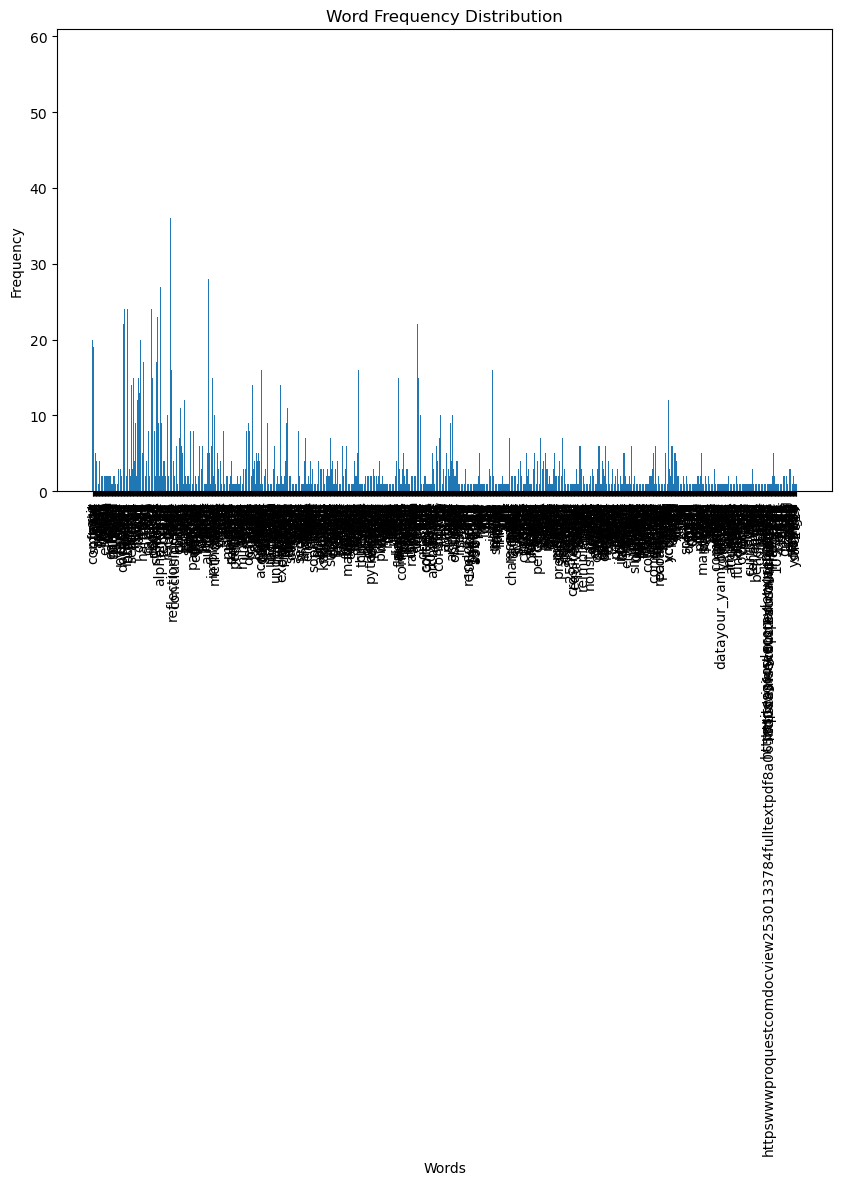

In [80]:
import matplotlib.pyplot as plt

# Plot word frequency distribution
plt.figure(figsize=(10, 6))
plt.bar(range(len(vocab)), list(vocab.values()), align='center')
plt.xticks(range(len(vocab)), list(vocab.keys()), rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution')
plt.tight_layout()
plt.show()